In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_URL = "https://raw.githubusercontent.com/PabloJRW/used-car-price-prediction/main/datasets/raw/used_cars.csv"
df = pd.read_csv(DATA_URL, delimiter=',')
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
# ¿Cuántos valores únicos tiene cada variable categórica?
for col in df.select_dtypes('object'):
    print(f"{col.ljust(15)}: {df[col].nunique()}")

brand          : 57
model          : 1898
milage         : 2818
fuel_type      : 7
engine         : 1146
transmission   : 62
ext_col        : 319
int_col        : 156
accident       : 2
clean_title    : 1
price          : 1569


In [5]:
df2 = pd.DataFrame()

### Price

In [6]:
# Eliminando caracteres y convirtiendo la variable 'price' a numérica
df['price'] = df['price'].str.replace("$", "").str.replace(",", "").astype(int)
df2['price'] = df['price']

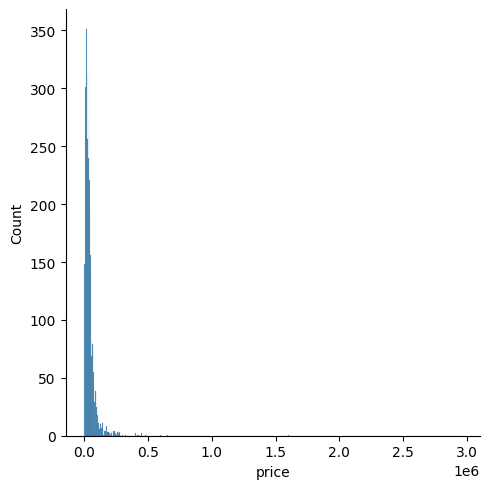

In [7]:
sns.displot(df['price'])
plt.savefig(os.path.join('..','img','price'))
plt.xlabel('
plt.show()

In [8]:
df['price'].describe()

count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64

In [9]:
df[df['price'] >= 500000].sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
979,Lamborghini,Aventador SVJ Base,2019,"6,929 mi.",Gasoline,759.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,649999
1508,Rolls-Royce,Phantom,2018,"7,585 mi.",Gasoline,6.8L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,–,–,None reported,Yes,599000
1356,Lamborghini,Aventador SVJ Base,2021,"6,987 mi.",Gasoline,6.5L V12 48V MPFI DOHC,7-Speed,–,Nero Ade,None reported,Yes,749950
3046,Porsche,Carrera GT Base,2005,"4,400 mi.",Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000
624,Rolls-Royce,Cullinan,2022,398 mi.,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,Silver,Charles Blue,None reported,Yes,695000


<Figure size 640x480 with 0 Axes>

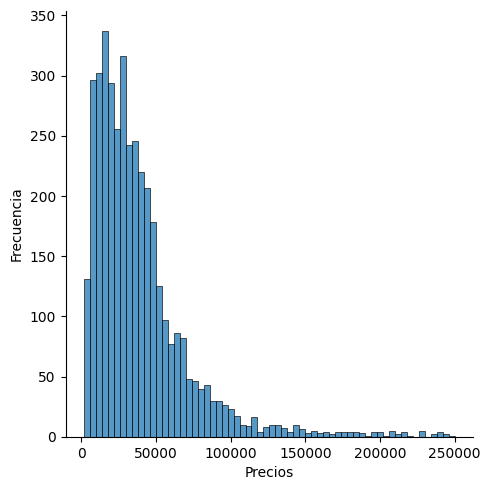

In [95]:
plt.figure()
sns.displot(df[df['price'] <= 250000]['price'])
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.show()

### Brand

In [71]:
# Cuántas marcas de autos?
df['brand'].nunique()

57

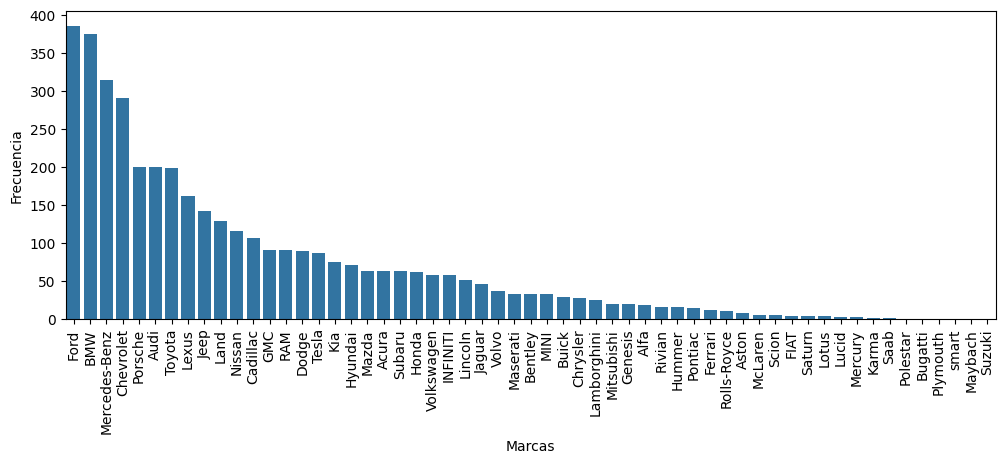

In [94]:
brand_count = df['brand'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=brand_count.index, y=brand_count.values)
plt.xticks(rotation=90)
plt.xlabel('Marcas')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join('..','img','brand_dist'))
plt.show()

In [11]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  

### Model Year

<Figure size 640x480 with 0 Axes>

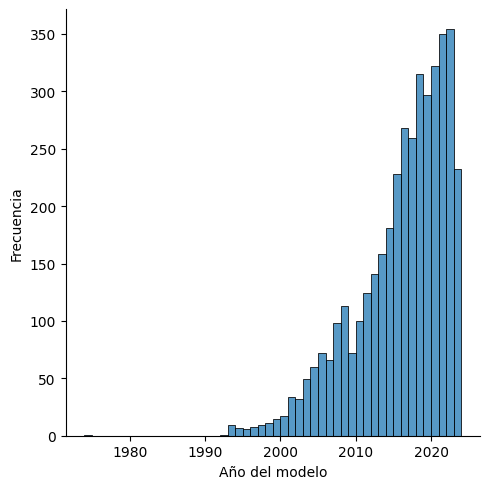

In [93]:
plt.figure()
sns.displot(df['model_year'])
plt.savefig(os.path.join('..','img','model_year_fig'))
plt.xlabel('Año del modelo')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
df['model_year'].describe()

count    4009.000000
mean     2015.515590
std         6.104816
min      1974.000000
25%      2012.000000
50%      2017.000000
75%      2020.000000
max      2024.000000
Name: model_year, dtype: float64

In [14]:
# ¿Cuántos autos por año?
df['model_year'].value_counts()

model_year
2022    354
2021    350
2020    322
2018    315
2019    297
2016    268
2017    259
2015    228
2023    226
2014    181
2013    158
2012    141
2011    124
2008    113
2010    100
2007     98
2005     72
2009     72
2006     66
2004     60
2003     49
2001     34
2002     32
2000     17
1999     15
1998     11
1997      9
1993      9
1996      8
1994      7
2024      6
1995      6
1974      1
1992      1
Name: count, dtype: int64

In [15]:
df2['model_year'] = df['model_year'].copy()

### Milage

In [16]:
# Verificanco los valores de 'milage'
df['milage']

0       51,000 mi.
1       34,742 mi.
2       22,372 mi.
3       88,900 mi.
4        9,835 mi.
           ...    
4004       714 mi.
4005    10,900 mi.
4006     2,116 mi.
4007    33,000 mi.
4008    43,000 mi.
Name: milage, Length: 4009, dtype: object

In [17]:
# Se encuentra 'mi.' en todas las entradas de 'mi.'?
df['milage'].str.split().str[1].unique()

array(['mi.'], dtype=object)

A continuación elimino la abreviatura de millas 'mi.' y comas ',' presente en los valores de la variable 'milage'. Posteriormente convierto la variable a tipo numérica.

In [18]:
# Extrayendo sólo los numeros, excluyendo 'mi'
df['milage'] = df['milage'].str.split().str[0]
# Convirtiendo la variable 'milage' a tipo numérico
df['milage'] = df['milage'].str.replace(",", "").astype(int)
df2['milage'] = df['milage'].copy()

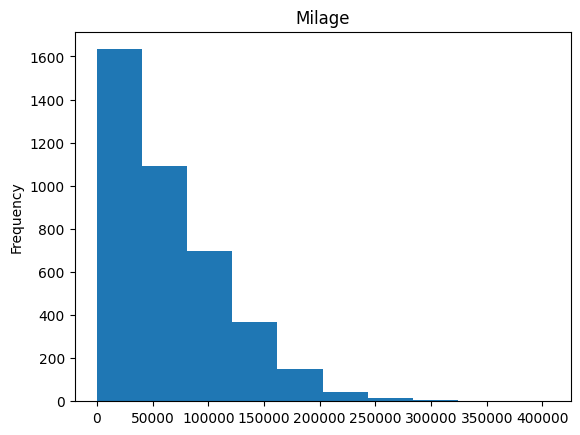

In [19]:
plt.figure()
plt.title('Milage')
df['milage'].plot(kind='hist')
plt.show()

### Fuel Type

In [20]:
# Cuántos tipos de combustible se encuentran en el dataset?
[print(x) for x in df['fuel_type'].unique()]

E85 Flex Fuel
Gasoline
Hybrid
nan
Diesel
Plug-In Hybrid
–
not supported


[None, None, None, None, None, None, None, None]

In [21]:
# Características de los autos que funcionan con combustible 'E85 Flex Fuel'
df[df['fuel_type']=='E85 Flex Fuel'][['brand','model','model_year','milage','engine','price']].sample(10)

,brand,model,model_year,milage,engine,price
3049,Chevrolet,Avalanche 1500 LS,2005,130000,295.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,7200
1445,GMC,Yukon SLT,2010,194500,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,9500
777,Chevrolet,Silverado 1500 1LT,2018,81000,285.0HP 4.3L V6 Cylinder Engine Flex Fuel Capa...,32000
1383,Ford,Explorer XLT,2017,169000,290.0HP 3.5L V6 Cylinder Engine Flex Fuel Capa...,13000
29,Audi,Q5 2.0T Premium Plus,2017,81880,2.0L I4 16V GDI DOHC Turbo Flexible Fuel,21375
1890,Chevrolet,Avalanche 1500 LTZ,2007,75124,310.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,16499
3190,Audi,Q5 2.0T Premium Plus,2015,54700,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,20995
3705,Chrysler,Town & Country Touring-L,2012,163500,283.0HP 3.6L V6 Cylinder Engine Flex Fuel Capa...,5949
2267,Ford,Focus SE,2017,91000,160.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,12500
125,Chevrolet,Express 1500 Work Van,2011,93009,5.3L V8 16V MPFI OHV Flexible Fuel,22495


In [22]:
# Características de los autos que funcionan con combustible 'Gasoline'
df[df['fuel_type']=='Gasoline'][['brand','model','model_year','milage','engine','price']].sample(10)

,brand,model,model_year,milage,engine,price
1595,Pontiac,Firebird Trans Am,2001,64000,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,21000
2881,Mitsubishi,Outlander Sport ES,2015,98385,166.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,10500
3198,Subaru,Impreza WRX Base,2013,113000,265.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,16000
2550,Toyota,Tundra Platinum,2023,8800,389.0HP 3.4L V6 Cylinder Engine Gasoline Fuel,68500
2911,Ford,F-150 Lariat,2021,36821,3.5L V6 24V PDI DOHC Twin Turbo,49273
2892,Chevrolet,Corvette Base,2007,4048,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,38000
3698,Ford,Expedition Platinum,2020,69849,3.5L V6 24V GDI DOHC Twin Turbo,48149
2386,Hyundai,Genesis Coupe 2.0T R-Spec,2013,55000,260.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,18000
2636,Lexus,LX 570 Three-Row,2020,59419,383.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,73000
1363,Jaguar,F-PACE 30t R-Sport,2019,34365,2.0 Liter,59598


In [23]:
df[df['fuel_type']=='Gasoline'][['engine']].sample(10)

,engine
2706,295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
3203,310.0HP 3.6L V6 Cylinder Engine Gasoline Fuel
2759,260.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
732,170.0HP 1.8L 4 Cylinder Engine Gasoline Fuel
93,5.2L V12 48V GDI DOHC Twin Turbo
2264,540.0HP 4.4L 8 Cylinder Engine Gasoline Fuel
2766,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel
3343,150.0HP 2.4L 4 Cylinder Engine Gasoline Fuel
3677,240.0HP 2.7L Flat 6 Cylinder Engine Gasoline Fuel
2428,2.5L I4 16V GDI DOHC


In [24]:
df[df['fuel_type']=='not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2894,Toyota,Mirai Limited,2021,44000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Gray,Black,None reported,Yes,18500
3700,Toyota,Mirai Base,2016,40000,not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,9500


In [25]:
df[df['fuel_type'].isna()][:10]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,34000,NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,69950
44,Lucid,Air Grand Touring,2022,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,119999
68,Lucid,Air Grand Touring,2022,4900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,99000
92,Rivian,R1S Adventure Package,2023,2800,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,Yes,92000
122,Rivian,R1S Adventure Package,2023,2500,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,Yes,94000
129,Lucid,Air Pure,2023,1300,NaN,620.0HP Electric Motor Electric Fuel System,A/T,Black,Gray,NaN,NaN,86900
155,Tesla,Model 3 Performance,2022,13079,NaN,455.0HP Electric Motor Electric Fuel System,A/T,Black,White,None reported,Yes,47000
189,Tesla,Model Y Performance,2023,500,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,White,None reported,Yes,60000
225,Tesla,Model X Base,2023,8200,NaN,670.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,93999
236,Polestar,2 Launch Edition,2021,12172,NaN,Electric,1-Speed Automatic,Thunder Gray,Charcoal,None reported,NaN,35999


In [26]:
# Convirtiendo valores 'nan' a 'electric'
df['fuel_type'] = df['fuel_type'].replace(np.nan, 'electric')
# Convirtiendo valores 'bot supported' a 'hydrogen'
df['fuel_type'] = df['fuel_type'].replace('not supported', 'hydrogen')

df2['fuel_type'] = df['fuel_type'].copy()

### Engine

In [27]:
import re

def extraer_caracteristicas_engine(engine):
    # Expresión regular para extraer la potencia 'hp'
    hp_pattern = r'(\d+\.\d+)HP'
    hp_matches = re.search(hp_pattern, engine)

    # Expresión regular para extraer la cilindrada 'L'
    cylinders_pattern = r'(\d+\.\d+)L'
    cylinders_matches = re.search(cylinders_pattern, engine)

    # Expresión regular para extraer el tipo de motor
    motor_pattern = r' (\w?\d+)'
    motor_matches = re.search(motor_pattern, engine)

    # Expresión regular para extraer el combustible
    fuel_pattern = r'(\w+\s?\w+\s?\w*) Fuel'
    fuel_matches = re.search(fuel_pattern, engine)

    # Asignar valores predeterminados en caso de no encontrar coincidencias
    hp = hp_matches.group(1) if hp_matches else None
    cylinders = cylinders_matches.group(1) if cylinders_matches else None
    motor = motor_matches.group(1) if motor_matches else None
    fuel = fuel_matches.group(1) if fuel_matches else None

    return hp, cylinders, motor, fuel


In [28]:
df['hp'], df['cylinders'], df['motor'], df['fuel_matches'] = zip(*df['engine'].apply(extraer_caracteristicas_engine))
df2['hp'], df2['cylinders'] = df['hp'], df['cylinders']

In [29]:
df.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,cylinders,motor,fuel_matches
388,Audi,Q7 55 Prestige,2019,73837,Gasoline,3.0L V6 24V GDI DOHC Supercharged,8-Speed Automatic,Cobra Beige Metallic,Nougat Brown,None reported,Yes,36340,None,3.0,V6,None
1822,BMW,X5 xDrive50i,2016,75479,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Silver,Black,None reported,Yes,27899,445.0,4.4,4,Cylinder Engine Gasoline
188,Mitsubishi,Lancer Evolution GSR,2012,33000,Gasoline,291.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Black,Black,None reported,Yes,34999,291.0,2.0,2,Cylinder Engine Gasoline
2641,Chevrolet,Suburban LTZ,2016,135484,Gasoline,5.3L V8 16V GDI OHV,6-Speed Automatic,Tungsten Metallic,Cocoa / Dune,NaN,NaN,29748,None,5.3,V8,None
1350,Audi,S5 3.0T Premium,2021,18100,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Gray,None reported,Yes,51800,349.0,3.0,3,Cylinder Engine Gasoline


In [30]:
df['engine']

0       300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                    3.8L V6 24V GDI DOHC
2                                          3.5 Liter DOHC
3       354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                              2.0L I4 16V GDI DOHC Turbo
                              ...                        
4004                     6.0L W12 48V PDI DOHC Twin Turbo
4005        349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
4006                                             Electric
4007        450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
4008         248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 4009, dtype: object

### Transmission

In [31]:
# ¿Cuántos tipos de transmisón?
df['transmission'].nunique()

62

In [32]:
# Transmisiones
df['transmission'].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [33]:
# Extrayendo las velocidades de la variable 'transmission'
df['speed'] = df['transmission'].str.extract(r'(\d+)')

df2['speed'] = df['speed'].copy()

In [34]:
def extraer_transmision(variable):
    """
    Esta función toma una variable que representa el tipo de transmisión de un vehículo
    y devuelve una categoría estandarizada (manual, automático, dual o 'other').
    """
    
    variable = variable.lower()
    tipos_de_transmision = {'manual': ['manual', 'mt', 'm/t'],
                            'automatic': ['automatic', 'a/t', 'at'],
                            'dual': ['dual', 'at/mt']}
    
    for tipo, etiquetas in tipos_de_transmision.items():
        if any(etiqueta in variable for etiqueta in etiquetas):
            return tipo
    
    return 'other'


In [35]:
# Aplicar la función para extraer el texto deseado y crear una nueva columna
df['transmission_'] = df['transmission'].apply(extraer_transmision)

df2['transmission'] = df['transmission_'].copy()

In [36]:
df.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,cylinders,motor,fuel_matches,speed,transmission_
3131,Kia,Sorento SXL,2017,108559,Gasoline,3.3L V6 24V GDI DOHC,6-Speed Automatic,Titanium Silver,Satin Black,None reported,NaN,15998,None,3.3,V6,None,6,automatic
3260,Porsche,911 Carrera Cabriolet,2006,96275,Gasoline,325.0HP 3.6L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Black,At least 1 accident or damage reported,Yes,52500,325.0,3.6,3,Cylinder Engine Gasoline,6,manual
680,BMW,X6 M Base,2023,7000,Gasoline,600.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Gray,None reported,Yes,144900,600.0,4.4,4,Cylinder Engine Gasoline,NaN,dual
1741,Hyundai,Santa Fe Sport 2.0L Turbo Ultimate,2018,71669,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,20000,240.0,2.0,2,Cylinder Engine Gasoline,NaN,automatic
1096,Acura,TLX V6 Advance,2019,25779,Gasoline,3.5L V6 24V GDI SOHC,9-Speed Automatic,Platinum White Pearl,Ebony,At least 1 accident or damage reported,NaN,30999,None,3.5,V6,None,9,automatic


### Accident

In [37]:
# ¿Cuántos valores únicos?
df['accident'].nunique()

2

In [38]:
# Valores únicos
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

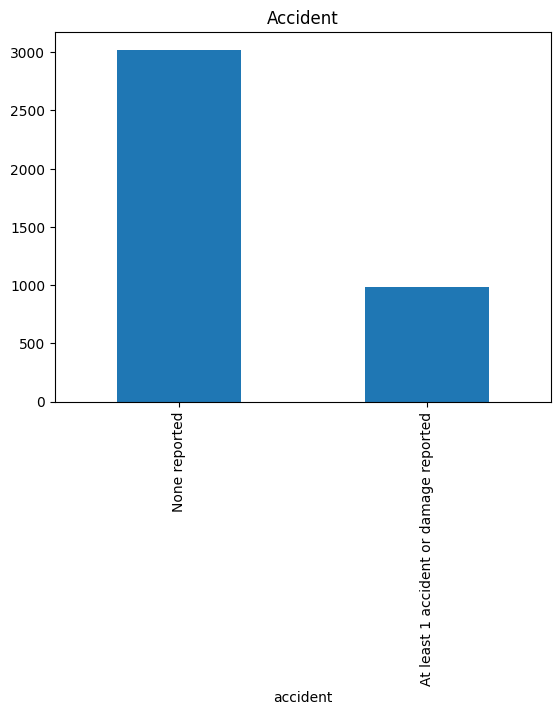

In [39]:
# Convierto los valores nulos a 'None reported'
df['accident'] = df['accident'].fillna('None reported')
df2['accident'] = df['accident'].copy()

plt.title('Accident')
df['accident'].value_counts().plot(kind='bar')
plt.show()

In [40]:
# Porcentaje de autos accidentados
df['accident'].value_counts() / df['accident'].count() * 100

accident
None reported                             75.405338
At least 1 accident or damage reported    24.594662
Name: count, dtype: float64

### Clean Title

In [41]:
# ¿Cuántos valores únicos?
df['clean_title'].nunique(dropna=False)

2

In [42]:
df['clean_title'].value_counts(dropna=False)

clean_title
Yes    3413
NaN     596
Name: count, dtype: int64

In [43]:
# Reemplazo valores nulos por 'no'
df['clean_title'].fillna('no', inplace=True)
df2['clean_title'] = df['clean_title'].copy()

In [44]:
df2

,price,model_year,milage,fuel_type,hp,cylinders,speed,transmission,accident,clean_title
0,10300,2013,51000,E85 Flex Fuel,300.0,3.7,6,automatic,At least 1 accident or damage reported,Yes
1,38005,2021,34742,Gasoline,None,3.8,8,automatic,At least 1 accident or damage reported,Yes
2,54598,2022,22372,Gasoline,None,None,NaN,automatic,None reported,no
3,15500,2015,88900,Hybrid,354.0,3.5,7,automatic,None reported,Yes
4,34999,2021,9835,Gasoline,None,2.0,8,automatic,None reported,no
...,...,...,...,...,...,...,...,...,...,...
4004,349950,2023,714,Gasoline,None,6.0,8,automatic,None reported,Yes
4005,53900,2022,10900,Gasoline,349.0,3.0,NaN,dual,None reported,Yes
4006,90998,2022,2116,electric,None,None,NaN,automatic,None reported,no
4007,62999,2020,33000,Gasoline,450.0,3.5,NaN,automatic,None reported,Yes
